In [2]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup

import warnings
warnings.filterwarnings('ignore')

In [32]:
code = '035720' # 카카오 종목코드
page = 7500 # 크롤 희망 페이지 (페이지당 20개 댓글)

date_list = [] # 날짜
comment_list = [] # 댓글
view_list = [] # 조회수
good_list = [] # 좋아요
bad_list = [] # 싫어요

for i in range(1,page+1):
    url = f'https://finance.naver.com/item/board.naver?code={code}&page={i}'
    headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.4896.127 Safari/537.36 Edg/100.0.1185.50'}
    res = requests.get(url, headers = headers)
    bs = BeautifulSoup(res.text, 'html.parser')
    
    for j in range(20):
        root = bs.find('div',{'class':'section inner_sub'}).find_all('tr',{'onmouseover':'mouseOver(this)'})[j].text.split('\n')
        
        date_list.append(root[1].split()[0].replace('.','-'))
        if len(root) == 14: # 답글
            comment_list.append('답글:'+root[4])
            view_list.append(root[10])
            good_list.append(root[11])
            bad_list.append(root[12])          
        elif len(root) == 13: # 기본
            comment_list.append(root[3])
            view_list.append(root[9])
            good_list.append(root[10])
            bad_list.append(root[11])
        else: # 에러
            comment_list.append('error')
            view_list.append(0)
            good_list.append(0)
            bad_list.append(0)       
    
    if i % 100 == 0:
        print(f'{i}페이지 크롤링 완료')
    

100페이지 크롤링 완료
200페이지 크롤링 완료
300페이지 크롤링 완료
400페이지 크롤링 완료
500페이지 크롤링 완료
600페이지 크롤링 완료
700페이지 크롤링 완료
800페이지 크롤링 완료
900페이지 크롤링 완료
1000페이지 크롤링 완료
1100페이지 크롤링 완료
1200페이지 크롤링 완료
1300페이지 크롤링 완료
1400페이지 크롤링 완료
1500페이지 크롤링 완료
1600페이지 크롤링 완료
1700페이지 크롤링 완료
1800페이지 크롤링 완료
1900페이지 크롤링 완료
2000페이지 크롤링 완료
2100페이지 크롤링 완료
2200페이지 크롤링 완료
2300페이지 크롤링 완료
2400페이지 크롤링 완료
2500페이지 크롤링 완료
2600페이지 크롤링 완료
2700페이지 크롤링 완료
2800페이지 크롤링 완료
2900페이지 크롤링 완료
3000페이지 크롤링 완료
3100페이지 크롤링 완료
3200페이지 크롤링 완료
3300페이지 크롤링 완료
3400페이지 크롤링 완료
3500페이지 크롤링 완료
3600페이지 크롤링 완료
3700페이지 크롤링 완료
3800페이지 크롤링 완료
3900페이지 크롤링 완료
4000페이지 크롤링 완료
4100페이지 크롤링 완료
4200페이지 크롤링 완료
4300페이지 크롤링 완료
4400페이지 크롤링 완료
4500페이지 크롤링 완료
4600페이지 크롤링 완료
4700페이지 크롤링 완료
4800페이지 크롤링 완료
4900페이지 크롤링 완료
5000페이지 크롤링 완료
5100페이지 크롤링 완료
5200페이지 크롤링 완료
5300페이지 크롤링 완료
5400페이지 크롤링 완료
5500페이지 크롤링 완료
5600페이지 크롤링 완료
5700페이지 크롤링 완료
5800페이지 크롤링 완료
5900페이지 크롤링 완료
6000페이지 크롤링 완료
6100페이지 크롤링 완료
6200페이지 크롤링 완료
6300페이지 크롤링 완료
6400페이지 크롤링 완료
6500페이지 크롤링 완료
6600페이지 크롤링 완료
6700페이지 크롤링 완료
6800

In [33]:
df = pd.DataFrame()
df['날짜'] = date_list
df['댓글'] = comment_list
df['조회수'] = view_list
df['좋아요'] = good_list
df['싫어요'] = bad_list
df.head()

,날짜,댓글,조회수,좋아요,싫어요
0,2022-04-29,오늘은 아쉽지만 종가 예상 9만-9만1천...,7,0,0
1,2022-04-29,카카오 방이에요 ~!,9,0,0
2,2022-04-29,하방 경직성,21,1,1
3,2022-04-29,15만간다고 입방정떨때부터 알아봤다..,17,1,0
4,2022-04-29,역시 개 지 랄은 개카오..,32,2,0


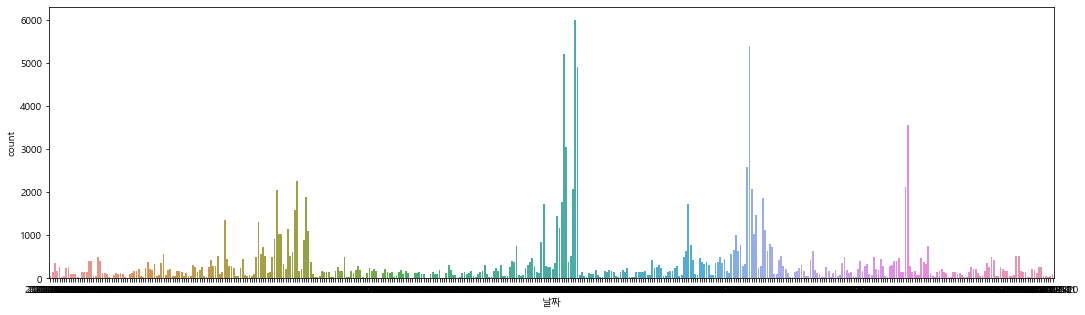

In [47]:
plt.figure(figsize=(18,5))
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.countplot(df['날짜'])
plt.show()

In [45]:
df.to_csv("./네이버종토방댓글.csv", index=False)

In [46]:
df1 = pd.read_csv('./네이버종토방댓글.csv')
df1

,날짜,댓글,조회수,좋아요,싫어요
0,2022-04-29,오늘은 아쉽지만 종가 예상 9만-9만1천...,7,0,0
1,2022-04-29,카카오 방이에요 ~!,9,0,0
2,2022-04-29,하방 경직성,21,1,1
3,2022-04-29,15만간다고 입방정떨때부터 알아봤다..,17,1,0
4,2022-04-29,역시 개 지 랄은 개카오..,32,2,0
...,...,...,...,...,...
149995,2021-02-10,"저 이제 시작한 주린이 인데,,,",898,2,0
149996,2021-02-10,답글:[삭제된 게시물의 답글]나는 익절한다,157,0,0
149997,2021-02-10,카카오도 공매가 있을것인데,228,1,0
149998,2021-02-10,카카오 목표가 585천원 써놓고,297,3,0
